# Creating a Filter, Edge Detection

### Import resources and display image

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

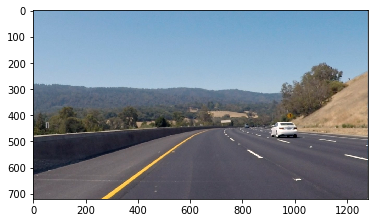

In [1]:
# Read in the image
image = mpimg.imread('data/curved_lane.jpg')

plt.imshow(image)

### Convert the image to grayscale

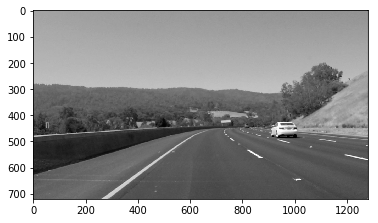

In [2]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

### TODO: Create a custom kernel

Below, you've been given one common type of edge detection filter: a Sobel operator.

The Sobel filter is very commonly used in edge detection and in finding patterns in intensity in an image. Applying a Sobel filter to an image is a way of **taking (an approximation) of the derivative of the image** in the x or y direction, separately. The operators look as follows.

<img src="notebook_ims/sobel_ops.png" width=200 height=200>

**It's up to you to create a Sobel x operator and apply it to the given image.**

For a challenge, see if you can put the image through a series of filters: first one that blurs the image (takes an average of pixels), and then one that detects the edges.

In [ ]:
# Create a custom kernel

# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                    [  0,  0,  0], 
                    [  1,  2,  1]])

## TODO: Create and apply a Sobel x operator
sobel_x = np.array([[ -1,  0,  1], 
                    [ -2,  0,  2], 
                    [ -1,  0,  1]])

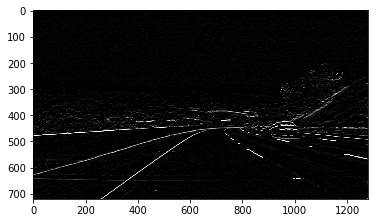

In [5]:
# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image = cv2.filter2D(gray, -1, sobel_y)

plt.imshow(filtered_image, cmap='gray')

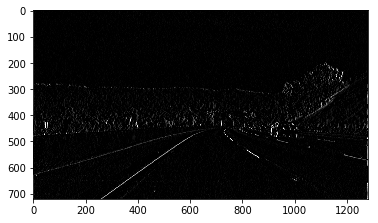

In [6]:
# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image = cv2.filter2D(gray, -1, sobel_x)

plt.imshow(filtered_image, cmap='gray')

### Test out other filters!

You're encouraged to create other kinds of filters and apply them to see what happens! As an **optional exercise**, try the following:
* Create a filter with decimal value weights.
* Create a 5x5 filter
* Apply your filters to the other images in the `images` directory.



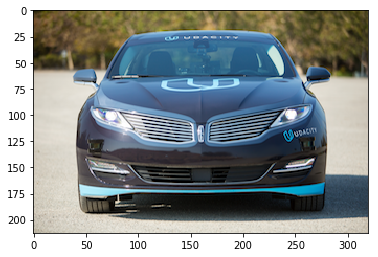

In [62]:
image = mpimg.imread('data/udacity_sdc.png')
plt.rcParams['figure.figsize'] = [6, 5]
plt.imshow(image)

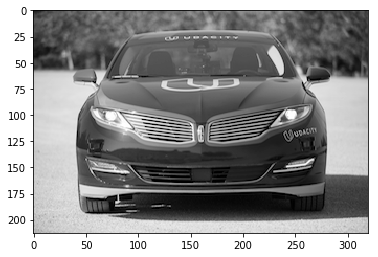

In [63]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

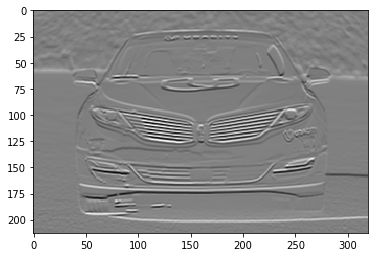

In [68]:
filtered_image_y = cv2.filter2D(gray, -1, sobel_y)

plt.imshow(filtered_image_y, cmap='gray')

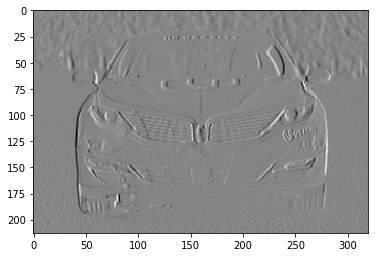

In [69]:
filtered_image_x = cv2.filter2D(gray, -1, sobel_x)

plt.imshow(filtered_image_x, cmap='gray')

In [70]:
imgboth = (filtered_image_y**2 + filtered_image_x**2)**0.5

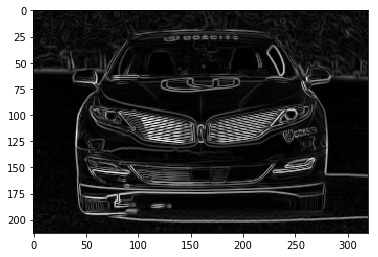

In [71]:
plt.imshow(imgboth, cmap='gray')

In [77]:
imgboth2 = cv2.addWeighted(filtered_image_x, 0.5, filtered_image_y, 0.5, 0)

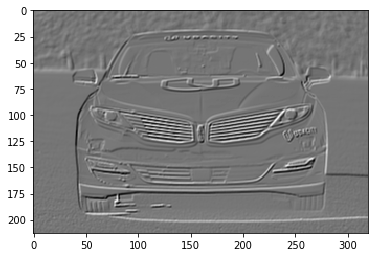

In [78]:
plt.imshow(imgboth2, cmap='gray')

In [95]:
imgboth2a = cv2.addWeighted(filtered_image_x**2, 0.5, filtered_image_y**2, 0.5, 0)

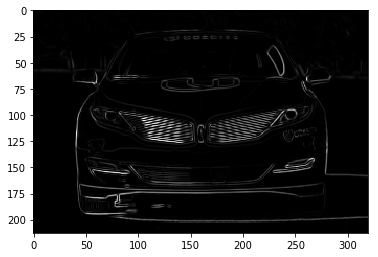

In [96]:
plt.imshow(imgboth2a, cmap='gray')

In [85]:
imgboth3 = np.hypot(filtered_image_x, filtered_image_y)
imgboth3 *= 255.0 / np.max(imgboth3)  # normalize

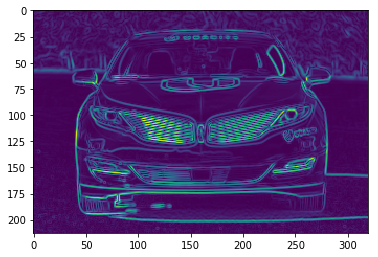

In [86]:
plt.imshow(imgboth3)

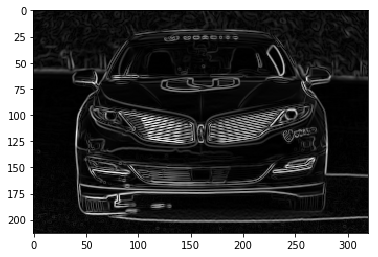

In [88]:
plt.imshow(imgboth3, cmap=plt.cm.gray)

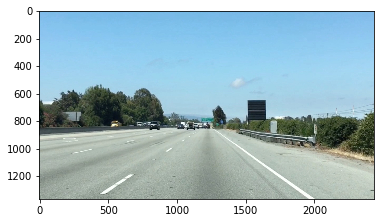

In [97]:
image = mpimg.imread('data/white_lines.jpg')
plt.rcParams['figure.figsize'] = [6, 5]
plt.imshow(image)

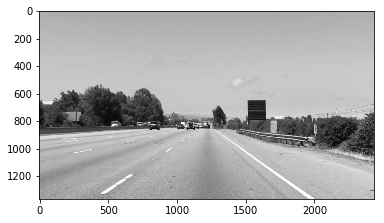

In [98]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

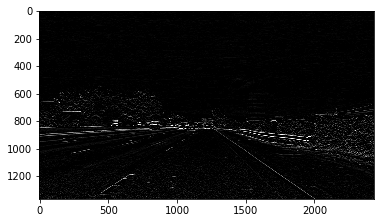

In [99]:
filtered_image_y = cv2.filter2D(gray, -1, sobel_y)

plt.imshow(filtered_image_y, cmap='gray')

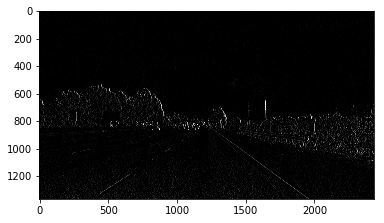

In [100]:
filtered_image_x = cv2.filter2D(gray, -1, sobel_x)

plt.imshow(filtered_image_x, cmap='gray')

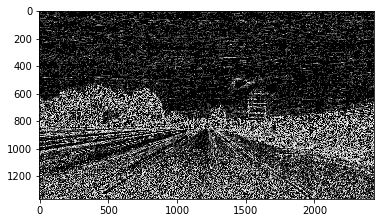

In [104]:
imgboth4 = (filtered_image_y**2 + filtered_image_x**2)**0.5

plt.imshow(imgboth4, cmap='gray')

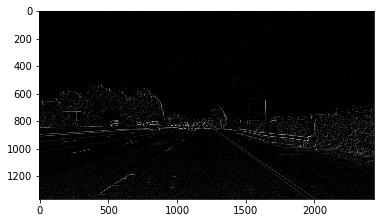

In [106]:
imgboth4 = cv2.addWeighted(filtered_image_x, 0.5, filtered_image_y, 0.5, 0)

plt.imshow(imgboth4, cmap='gray')

## A simple implementation of sobel filtering in Python

https://fengl.org/2014/08/27/a-simple-implementation-of-sobel-filtering-in-python/

Uses ndimage and signal of scipy...

In [24]:
import numpy as np
from scipy import ndimage
from scipy import signal
import matplotlib.pyplot as plt

In [13]:
im = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [14]:
dx = ndimage.sobel(im, 0)  # horizontal derivative
dy = ndimage.sobel(im, 1)  # vertical derivative
mag = np.hypot(dx, dy)  # magnitude
mag *= 255.0 / np.max(mag)  # normalize

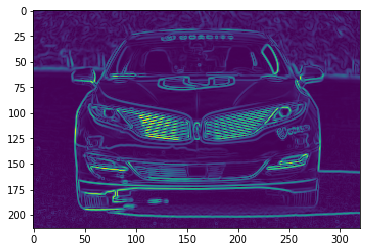

In [15]:
plt.imshow(mag)

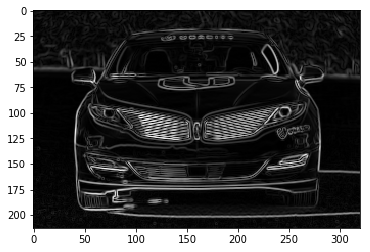

In [16]:
plt.figure()
plt.imshow(mag, cmap=plt.cm.gray) 

Or, create your own...

In [18]:
def sobel_filter(im, k_size):
     
    im = im.astype(np.float)
    width, height, c = im.shape
    if c > 1:
        img = 0.2126 * im[:,:,0] + 0.7152 * im[:,:,1] + 0.0722 * im[:,:,2]
    else:
        img = im
     
    assert(k_size == 3 or k_size == 5);
     
    if k_size == 3:
        kh = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype = np.float)
        kv = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype = np.float)
    else:
        kh = np.array([[-1, -2, 0, 2, 1], 
                       [-4, -8, 0, 8, 4], 
                       [-6, -12, 0, 12, 6],
                       [-4, -8, 0, 8, 4],
                       [-1, -2, 0, 2, 1]], dtype = np.float)
        kv = np.array([[1, 4, 6, 4, 1], 
                       [2, 8, 12, 8, 2],
                       [0, 0, 0, 0, 0], 
                       [-2, -8, -12, -8, -2],
                       [-1, -4, -6, -4, -1]], dtype = np.float)
     
    gx = signal.convolve2d(img, kh, mode='same', boundary = 'symm', fillvalue=0)
    gy = signal.convolve2d(img, kv, mode='same', boundary = 'symm', fillvalue=0)
 
    g = np.sqrt(gx * gx + gy * gy)
    g *= 255.0 / np.max(g)
   
    #plt.figure()
    #plt.imshow(g, cmap=plt.cm.gray)      
   
    return g

In [22]:
image.shape

(213, 320, 4)

In [25]:
g = sobel_filter(image, 3)

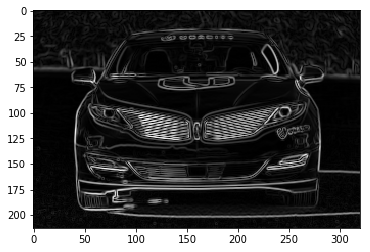

In [26]:
plt.figure()
plt.imshow(g, cmap=plt.cm.gray)  

In [27]:
g = sobel_filter(image, 5)

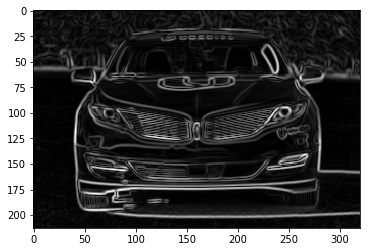

In [28]:
plt.figure()
plt.imshow(g, cmap=plt.cm.gray) 

## IMAGE EDGE DETECTION : SOBEL AND LAPLACIAN

https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Gradient_Sobel_Laplacian_Derivatives_Edge_Detection.php

### Sobel Edge Detection
Sobel edge detector is a gradient based method based on the first order derivatives. It calculates the first derivatives of the image separately for the X and Y axes.

The operator uses two 3X3 kernels which are convolved with the original image to calculate approximations of the derivatives - one for horizontal changes, and one for vertical. The picture below shows Sobel Kernels in x-dir and y-dir:

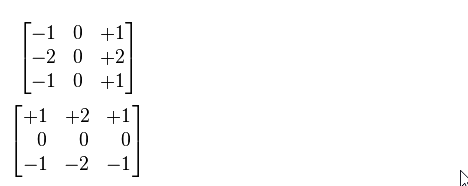

For more details on Sobel operation, please check [Sobel operator](http://en.wikipedia.org/wiki/Sobel_operator)

### Laplacian Edge Detection
Unlike the Sobel edge detector, the Laplacian edge detector uses only one kernel. It calculates second order derivatives in a single pass.

A kernel used in this Laplacian detection looks like this:
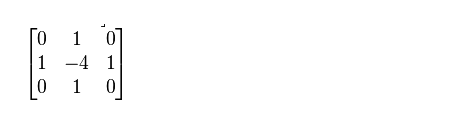    

If we want to consider the diagonals, we can use the kernel below:
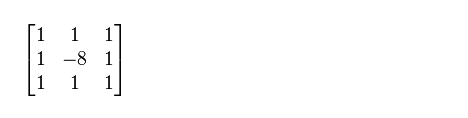

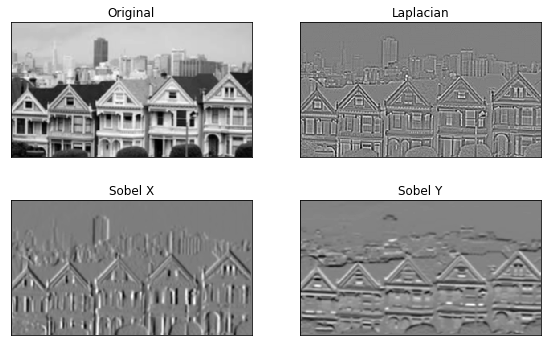

In [53]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# loading image
img0 = cv2.imread('data\SanFrancisco.jpg',)
#img0 = cv2.imread('data\windows.jpg',)

# converting to gray scale
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

# remove noise
img = cv2.GaussianBlur(gray,(3,3),0)

# convolute with proper kernels
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y

plt.rcParams['figure.figsize'] = [9.5, 6]
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()


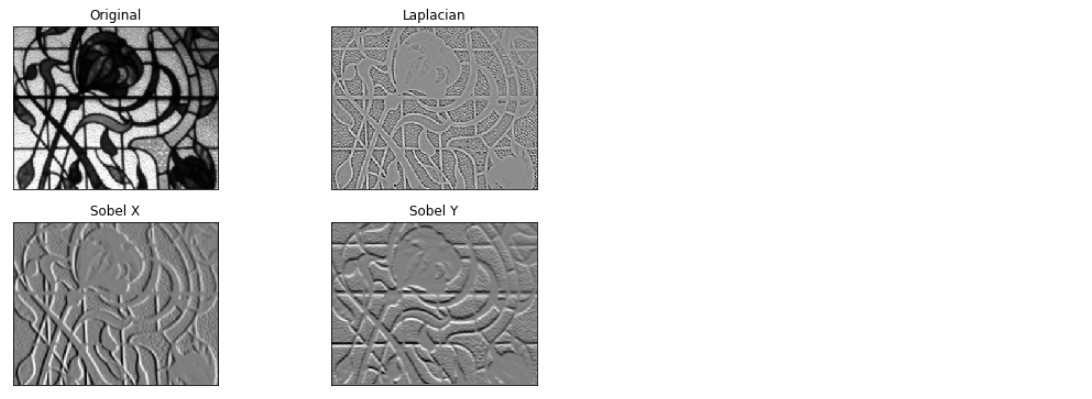

## SKIKIT-Image

http://scikit-image.org/docs/dev/auto_examples/edges/plot_edge_filter.html

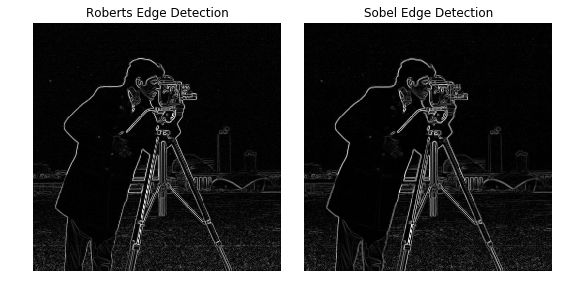

In [29]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.data import camera
from skimage.filters import roberts, sobel, scharr, prewitt

image = camera()
edge_roberts = roberts(image)
edge_sobel = sobel(image)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(8, 4))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

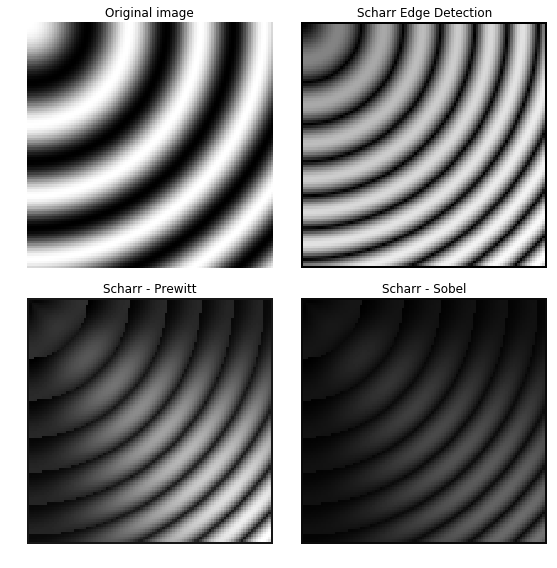

In [30]:
x, y = np.ogrid[:100, :100]
# Rotation-invariant image with different spatial frequencies
img = np.exp(1j * np.hypot(x, y)**1.3 / 20.).real

edge_sobel = sobel(img)
edge_scharr = scharr(img)
edge_prewitt = prewitt(img)

diff_scharr_prewitt = edge_scharr - edge_prewitt
diff_scharr_sobel = edge_scharr - edge_sobel
max_diff = np.max(np.maximum(diff_scharr_prewitt, diff_scharr_sobel))

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True,
                         figsize=(8, 8))
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(edge_scharr, cmap=plt.cm.gray)
ax[1].set_title('Scharr Edge Detection')

ax[2].imshow(diff_scharr_prewitt, cmap=plt.cm.gray, vmax=max_diff)
ax[2].set_title('Scharr - Prewitt')

ax[3].imshow(diff_scharr_sobel, cmap=plt.cm.gray, vmax=max_diff)
ax[3].set_title('Scharr - Sobel')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

## Medium - what is image processing?

https://medium.com/@enzoftware/how-to-build-amazing-images-filters-with-python-median-filter-sobel-filter-%EF%B8%8F-%EF%B8%8F-22aeb8e2f540

In [48]:
image = mpimg.imread('data/white_lines.jpg')
im = image.astype(np.float)
width, height, c = im.shape

In [49]:
width, height, c

(1366, 2436, 3)

In [50]:
from PIL import Image
import math
path = "data\white_lines.jpg" # Your image path 
img = Image.open(path)
newimg = Image.new("RGB", (width, height), "white")
for x in range(1, width-1):  # ignore the edge pixels for simplicity (1 to width-1)
    for y in range(1, height-1): # ignore edge pixels for simplicity (1 to height-1)

        # initialise Gx to 0 and Gy to 0 for every pixel
        Gx = 0
        Gy = 0

        # top left pixel
        p = img.getpixel((x-1, y-1))
        r = p[0]
        g = p[1]
        b = p[2]

        # intensity ranges from 0 to 765 (255 * 3)
        intensity = r + g + b

        # accumulate the value into Gx, and Gy
        Gx += -intensity
        Gy += -intensity

        # remaining left column
        p = img.getpixel((x-1, y))
        r = p[0]
        g = p[1]
        b = p[2]

        Gx += -2 * (r + g + b)

        p = img.getpixel((x-1, y+1))
        r = p[0]
        g = p[1]
        b = p[2]

        Gx += -(r + g + b)
        Gy += (r + g + b)

        # middle pixels
        p = img.getpixel((x, y-1))
        r = p[0]
        g = p[1]
        b = p[2]

        Gy += -2 * (r + g + b)

        p = img.getpixel((x, y+1))
        r = p[0]
        g = p[1]
        b = p[2]

        Gy += 2 * (r + g + b)

        # right column
        p = img.getpixel((x+1, y-1))
        r = p[0]
        g = p[1]
        b = p[2]

        Gx += (r + g + b)
        Gy += -(r + g + b)

        p = img.getpixel((x+1, y))
        r = p[0]
        g = p[1]
        b = p[2]

        Gx += 2 * (r + g + b)

        p = img.getpixel((x+1, y+1))
        r = p[0]
        g = p[1]
        b = p[2]

        Gx += (r + g + b)
        Gy += (r + g + b)

        # calculate the length of the gradient (Pythagorean theorem)
        length = math.sqrt((Gx * Gx) + (Gy * Gy))

        # normalise the length of gradient to the range 0 to 255
        length = length / 4328 * 255

        length = int(length)

        # draw the length in the edge image
        #newpixel = img.putpixel((length,length,length))
        newimg.putpixel((x,y),(length,length,length))

IndexError: image index out of range